In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\efere\Desktop\User Activity - March 2018 (Intern Assesment).xlsx", skiprows=1)
df.head()

,User,Age,Site,Average Session Time (Minutes),Interactions this Month,Device,New/Returning,Source
0,Gouldy,38,JumpUp,32.885549,9,Mobile,N,Organic
1,Carr,41,StartFresh,12.770629,8,Desktop,N,Referral
2,Bishop,53,HealthWise,32.613916,1,Desktop,R,Referral
3,Clements,63,HealthWise,37.047459,4,Desktop,N,Referral
4,Cortez,34,JumpUp,19.852115,10,Desktop,N,Referral


In [3]:
#User Activity count on each site
corr1 = df["Site"].value_counts().to_frame()
corr1.rename(columns={'Site':'Count'}, inplace=True)
corr1.index.name = 'Sites'
corr1

,Count
Sites,
StartFresh,46
HealthWise,28
JumpUp,26


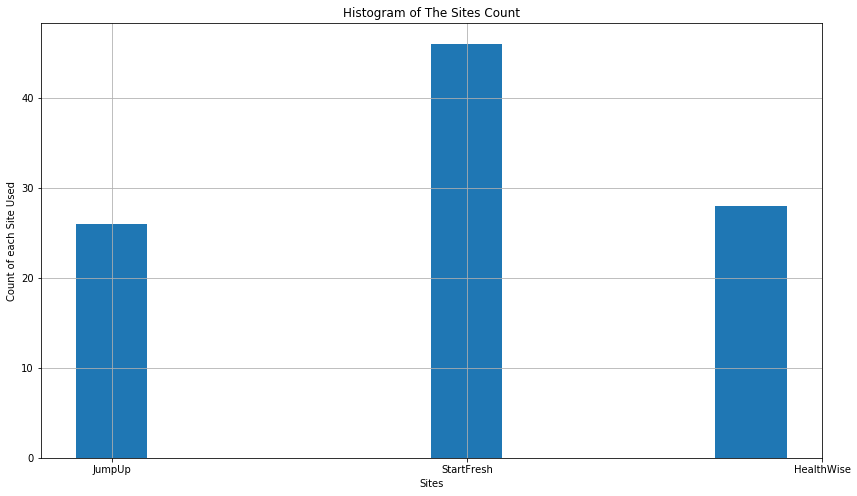

In [8]:
df["Site"].hist(figsize=(14,8), align='left')
plt.xlabel('Sites')
plt.ylabel('Count of each Site Used')
plt.title('Histogram of The Sites Count')
plt.show()

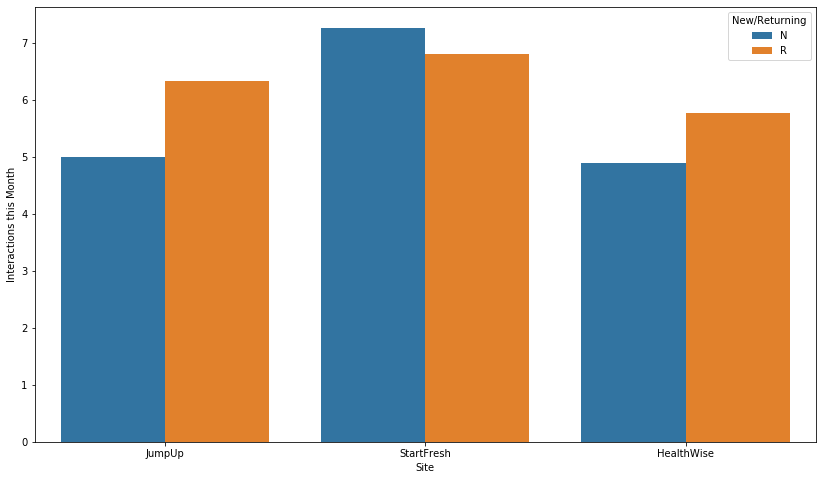

In [9]:
#Interactions this month
plt.figure(figsize=(14,8))
sns.barplot(x="Site", y="Interactions this Month", hue="New/Returning", data=df, 
              hue_order = ["N", "R"], ci=None)

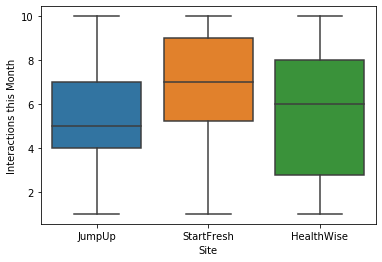

In [14]:
sns.boxplot(df['Site'], df['Interactions this Month'])

In [23]:
#average interaction time
group1 = df[['Site','Interactions this Month']]
groupy = group1.groupby(['Site'], as_index=False).mean()
groupy

,Site,Interactions this Month
0,HealthWise,5.464286
1,JumpUp,5.307692
2,StartFresh,7.065217


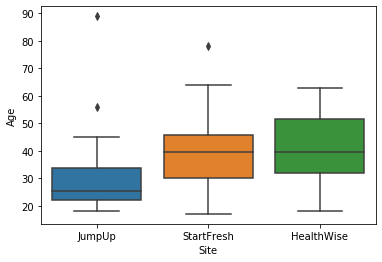

In [10]:
sns.boxplot(df['Site'],df['Age'])

In [11]:
group1 = df[['Site','Age']]
groupy = group1.groupby(['Site'], as_index=False).mean()
groupy

,Site,Age
0,HealthWise,40.464286
1,JumpUp,31.269231
2,StartFresh,39.586957


Text(0.5, 1.0, 'Average age of users for each Site')

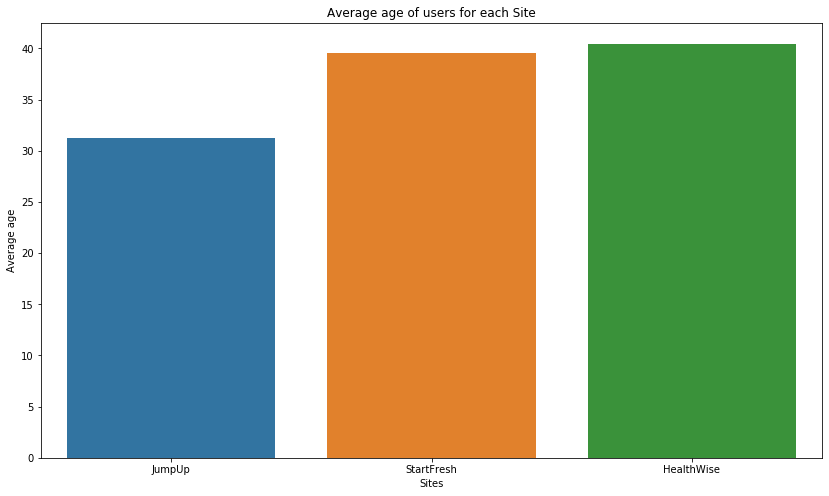

In [24]:
plt.figure(figsize=(14,8))
sns.barplot(x="Site", y="Age", data=df, ci=None)
plt.ylabel("Average age")
plt.xlabel("Sites")
plt.title("Average age of users for each Site")

In [13]:
#Finding out the total number of users that are returning or new
new = df[df['New/Returning'] == 'N']
returning = df[df['New/Returning'] == 'R']
print(len(new), len(returning))

56 44


Text(0.5, 1.0, 'Count of users either new or returning')

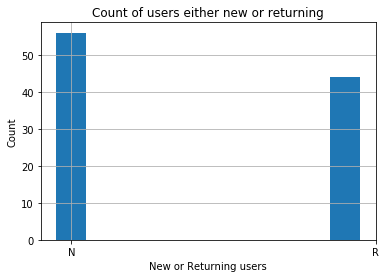

In [17]:
df["New/Returning"].hist(align='left')
plt.xlabel("New or Returning users")
plt.ylabel("Count")
plt.title("Count of users either new or returning")

In [18]:
group1 = df[['Site','Average Session Time (Minutes)']]
groupy = group1.groupby(['Site'], as_index=False).mean()
groupy

,Site,Average Session Time (Minutes)
0,HealthWise,31.573758
1,JumpUp,23.089955
2,StartFresh,25.220055


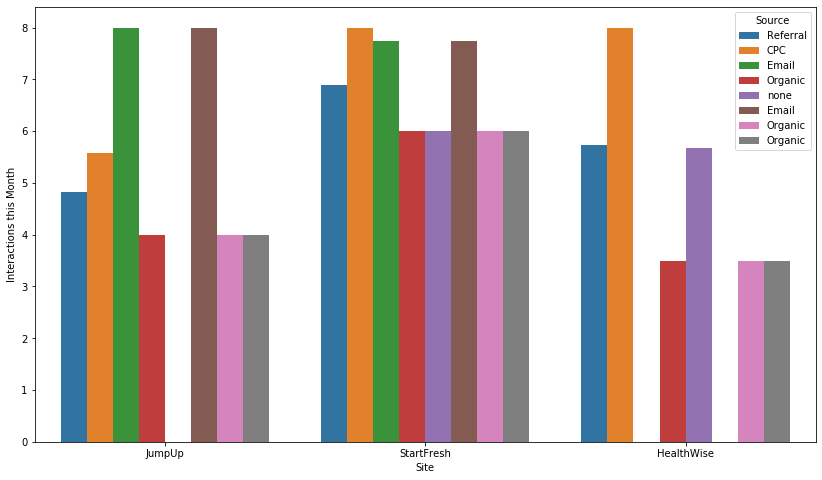

In [19]:
#Source for the site
plt.figure(figsize=(14,8))
sns.barplot(x="Site", y="Interactions this Month", hue="Source", data=df, 
              hue_order = ["Referral", "CPC", "Email","Organic","none","Email","Organic","Organic"], ci=None)

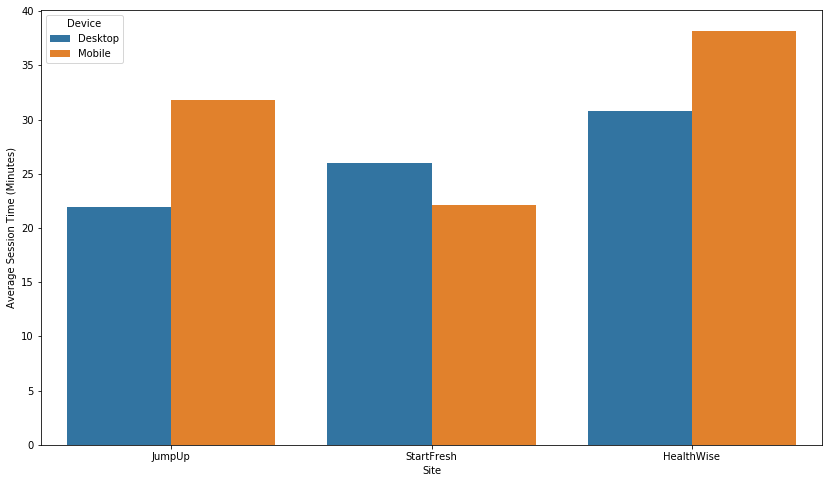

In [25]:
#modes of accessing the sites
plt.figure(figsize=(14,8))
sns.barplot(x="Site", y="Average Session Time (Minutes)", hue="Device", data=df, 
              hue_order = ["Desktop", "Mobile"], ci=None)

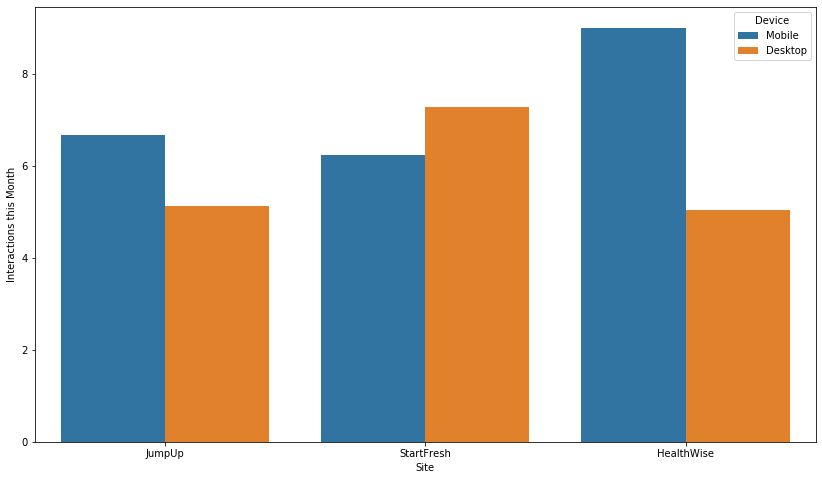

In [27]:
#Interactions this month based on the device used
plt.figure(figsize=(14,8))
sns.barplot(x="Site", y="Interactions this Month", hue="Device", data=df, 
               ci=None)

In [26]:
df.describe(include = 'all')

,User,Age,Site,Average Session Time (Minutes),Interactions this Month,Device,New/Returning,Source
count,100,100.000000,100,100.000000,100.000000,100,100,100
unique,99,NaN,3,NaN,NaN,2,2,8
top,Lambert,NaN,StartFresh,NaN,NaN,Desktop,N,Referral
freq,2,NaN,46,NaN,NaN,85,56,58
mean,NaN,37.670000,NaN,26.445266,6.160000,NaN,NaN,NaN
std,NaN,13.907381,NaN,9.835264,2.773322,NaN,NaN,NaN
min,NaN,17.000000,NaN,6.851782,1.000000,NaN,NaN,NaN
25%,NaN,26.000000,NaN,18.527822,4.000000,NaN,NaN,NaN
50%,NaN,37.000000,NaN,25.574066,6.500000,NaN,NaN,NaN
75%,NaN,45.000000,NaN,34.731861,8.250000,NaN,NaN,NaN
